# 행렬 분해 중 
## Singular value decomposition

In [1]:
import numpy as np

In [3]:
A = np.random.random((5,3))
print(A)

[[0.94779445 0.94064497 0.65949004]
 [0.49654947 0.98294434 0.07714367]
 [0.7319906  0.63054779 0.57509368]
 [0.67686936 0.27886296 0.70405382]
 [0.16217008 0.59592957 0.71966839]]


In [4]:
U,S,V_T = np.linalg.svd(A)

In [5]:
print(U)

[[-0.61000669 -0.06528462 -0.22467544 -0.44867132  0.60979075]
 [-0.39383024 -0.77821567  0.0567995   0.47374453 -0.10778707]
 [-0.45928987  0.10936413 -0.19523432 -0.35670749 -0.7821353 ]
 [-0.37978899  0.56900746 -0.28347892  0.66853999  0.06844575]
 [-0.34293254  0.23321296  0.90984506 -0.00861512  0.01080461]]


In [7]:
print(np.diag(S))

[[2.4344111  0.         0.        ]
 [0.         0.70242881 0.        ]
 [0.         0.         0.4605199 ]]


In [8]:
print(V_T)

[[-0.58436882 -0.64113652 -0.49745055]
 [ 0.07789887 -0.65449968  0.75203852]
 [-0.80774058  0.40071703  0.43241301]]


In [16]:
V = V_T.T
S_inv = np.c_[np.diag(1/S), np.zeros((3,2))]
print(S_inv)
U_T = U.T

[[0.41077696 0.         0.         0.         0.        ]
 [0.         1.42363182 0.         0.         0.        ]
 [0.         0.         2.17145884 0.         0.        ]]


In [17]:
A_inv = np.dot(V,S_inv)
A_inv = np.dot(A_inv, U_T)

In [18]:
print(A_inv)

[[ 0.53326438 -0.09139143  0.46481496  0.65148414 -1.4876634 ]
 [ 0.0259847   0.87825964 -0.15082266 -0.67682584  0.66470914]
 [-0.15620873 -0.69936929  0.02762133  0.42062334  1.17407365]]


In [20]:
print(np.round(np.dot(A_inv, A), 3))

[[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


# 
## IU 를 특이값분해하여 보자

# 
## IU는 RGB 사진 (m,n,3) 형태임,
## IU 행렬을 3채널로 나누어서 각 이미지를 (mxn) 행렬로 생각하여
## 특이값 분해를 통해 특이값을 얼만큼 사용하면 IU 사진으로 복원되는지 코딩해봄

In [46]:
import matplotlib.pyplot as plt

In [47]:
import cv2

img = cv2.imread('/home/oem/KYM/통계적 기계학습-고선우 교수님/IU.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

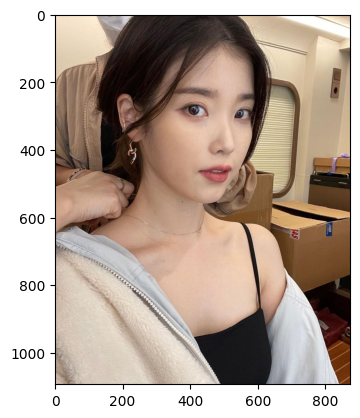

In [48]:
plt.imshow(img)
plt.show()

In [49]:
img = np.array(img)
print(np.shape(img))

(1094, 875, 3)


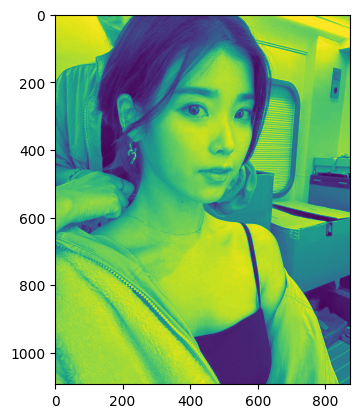

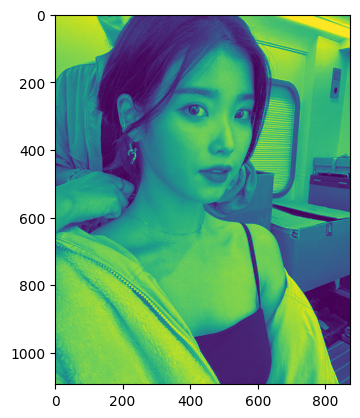

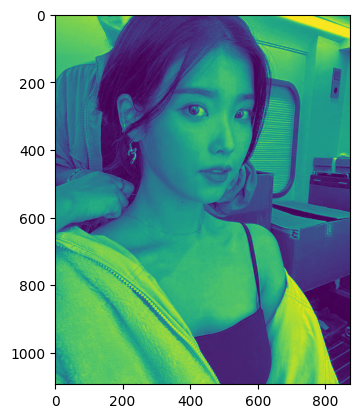

In [50]:
img1 = img[:,:,0]
plt.imshow(img1)
plt.show()
img2 = img[:,:,1]
plt.imshow(img2)
plt.show()
img3 = img[:,:,2]
plt.imshow(img3)
plt.show()

In [52]:
A1 = img1
A2 = img2
A3 = img3

In [53]:
U1,S1,V_T1 = np.linalg.svd(A1)
U2,S2,V_T2 = np.linalg.svd(A2)
U3,S3,V_T3 = np.linalg.svd(A3)

In [54]:
print(np.shape(U1))
print(np.shape(S1))
print(np.shape(V_T1))

(1094, 1094)
(875,)
(875, 875)


In [55]:
import os, sys

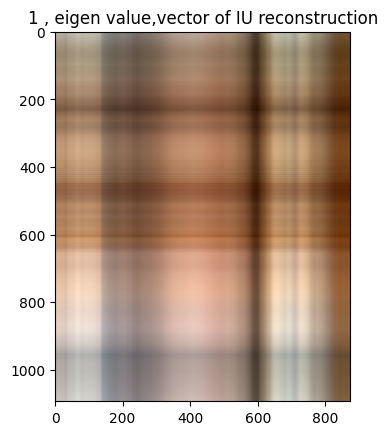

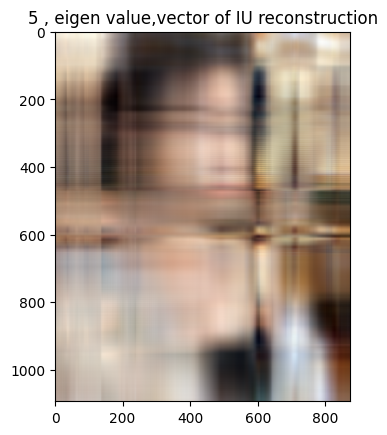

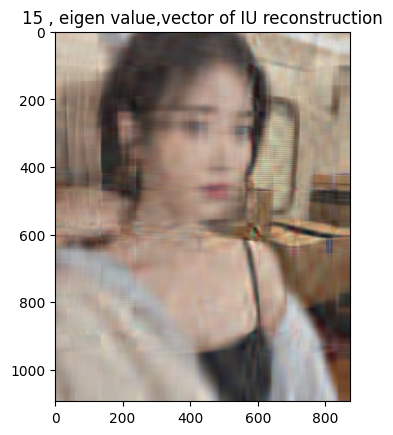

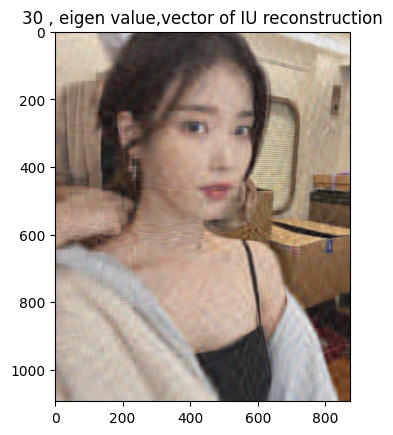

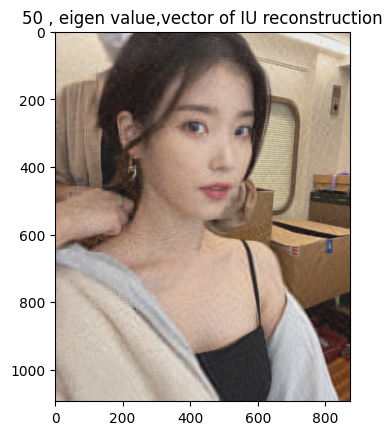

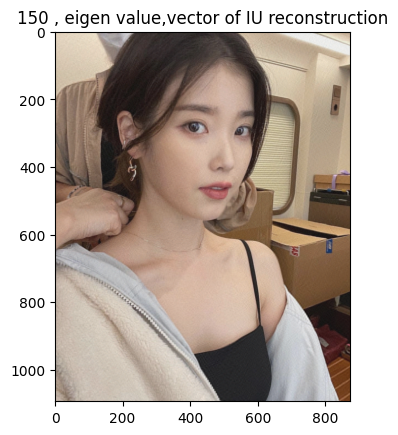

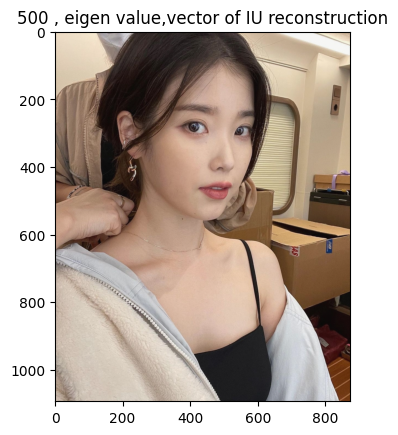

In [58]:
l = [1, 5, 15, 30, 50 ,150 ,500]

for q in l:
    t1 = 0
    for i in range(q):
        v_i = np.reshape(U1[:,i], (-1,1))
        v_j = np.reshape(V_T1[i,:], (1, -1))
        r = S1[i] * np.dot(v_i, v_j)
        t1 += r
    t1 = np.reshape(t1, (1094, 875, 1))
    t1 = (t1 - np.min(t1) / (np.max(t1) - np.min(t1)))
    
    t2 = 0
    for i in range(q):
        v_i = np.reshape(U2[:,i], (-1,1))
        v_j = np.reshape(V_T2[i,:], (1, -1))
        r = S2[i] * np.dot(v_i, v_j)
        t2 += r
    t2 = np.reshape(t2, (1094, 875, 1))
    t2 = (t2 - np.min(t2) / (np.max(t2) - np.min(t2)))
        
    t3 = 0
    for i in range(q):
        v_i = np.reshape(U3[:,i], (-1,1))
        v_j = np.reshape(V_T3[i,:], (1, -1))
        r = S3[i] * np.dot(v_i, v_j)
        t3 += r
    t3 = np.reshape(t3, (1094, 875, 1))
    t3 = (t3 - np.min(t3) / (np.max(t3) - np.min(t3)))
    
    t = np.concatenate((t1, t2, t3), axis=2)
    t = (t - np.min(t)) / (np.max(t) - np.min(t))
    plt.title("{} , eigen value,vector of IU reconstruction".format(q))
    plt.imshow(t)
    plt.show()